# **CS 5361/6361 Machine Learning - Classifying the MNIST dataset**

**Author:** Olac Fuentes<br>
Computer Science Department<br>
University of Texas at El Paso<br>
**Last modified:** 9/5/2024<br>

**Classifying the MNIST dataset**

We will implement three simple techniques to classify 28-by-28 images of digits, included in the well-known MNIST dataset. For each technique, the input and output are as follows:

**Input:** A dataset consisting of pairs *(X,y)*, where *X* consists of 784 pixel intensity values and *y* is an integer indicating the digit contained in *X*.

**Output:** A *model* (or function) that receives instances of *X* and
predicts their corresponding *y*.

We also need to estimate how well each model works; that is, how often the class it predicts for a given *X* is the correct one.



# Loading the data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Class: 9


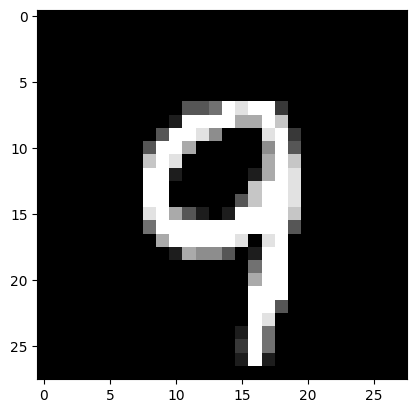

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 086 086 114 255 226 255 255 057 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 029 255 255 255 255 170 170 255 198 000 000 000 000 000 

In [3]:
im = np.random.randint(0,X_train.shape[0])
plt.imshow(X_train[im],cmap='gray')
print('Class:',y_train[im])
plt.show()

for i in range(28):
    for j in range(28):
        print(str(X_train[im,i,j]+1000)[1:],end=' ')
    print()

# Pre-processing

In [4]:
X_train = X_train.reshape(X_train.shape[0],-1)/255
X_test = X_test.reshape(X_test.shape[0],-1)/255

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {'log_reg' : LogisticRegression(),
               'knn': KNeighborsClassifier(n_neighbors=1,algorithm='brute', n_jobs=-1),
               'decision tree': DecisionTreeClassifier(max_depth=3)}

for c in classifiers:
    print(f'Classifier: {c}')
    classifier = classifiers[c]
    start = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    print('Elapsed time training= {:.4f} secs'.format(end-start))
    start = time.time()
    pred = classifier.predict(X_test)
    end = time.time()
    print('Elapsed time testing= {:.4f} secs'.format(end-start))
    print(f'Confusion matrix:\n{confusion_matrix(y_test,pred)}')
    print(f'Accuracy: {accuracy_score(y_test,pred):6.4f}')
    print(f'Precision: {precision_score(y_test,pred,average="macro"):6.4f}')
    print(f'Recall: {recall_score(y_test,pred,average="macro"):6.4f}')
    print(f'F1: {f1_score(y_test,pred,average="macro"):6.4f}')

Classifier: log_reg


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Elapsed time training= 53.9514 secs
Elapsed time testing= 0.0271 secs
Confusion matrix:
[[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4]
 [   4    1   18  917    1   22    4   11   25    7]
 [   1    1    7    3  914    0   10    4   10   32]
 [  10    2    3   34    7  783   14    6   29    4]
 [   9    3    8    2    7   14  912    2    1    0]
 [   1    8   24    5    7    1    0  950    3   29]
 [   9   11    8   23    7   25   12    7  861   11]
 [   9    8    0   11   24    6    0   19    7  925]]
Accuracy: 0.9258
Precision: 0.9250
Recall: 0.9248
F1: 0.9248
Classifier: knn
Elapsed time training= 0.0517 secs
Elapsed time testing= 40.7822 secs
Confusion matrix:
[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
'''
means = 10 * 784
X = 60000 * 784
# take average of all zeros, use as metric
'''


class NearestMean:

    def __init__(self):
        pass

    def fit(self, X, y):
        # Initialize means for each class, with shape (number of classes, number of features)
        self.means = np.zeros((np.max(y) + 1, X.shape[1]))

        # Calculate the mean for each class
        for i in range(self.means.shape[0]):
            self.means[i] = np.mean(X[y == i], axis=0)

    def predict(self, X):
        # Compute distances from each sample in X to each class mean
        dist = np.zeros((X.shape[0], self.means.shape[0]))

        for i in range(self.means.shape[0]):
            dist[:, i] = np.sum((X - self.means[i])**2, axis=1)

        # Return the index of the closest mean (class label)
        return np.argmin(dist, axis=1)


model = NearestMean()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [7]:
accuracy = np.sum((y_test == predictions)) / predictions.shape[0]
print(accuracy)

matrix = confusion_matrix(y_test, predictions)
print(matrix)

# print(y_test[0]) # the first number is a 7, predicted as 7
# print(predictions[0])

indices = []
i = 0
# for actual, predicted in y_test[], predictions[:20]:
#   if actual == 0 and predicted == 1:
#     indices.append(i)
#   i += 1


for i in range(predictions.shape[0]):
  if y_test[i] == 2 and predictions[i] == 3:
    indices.append(i) # list of the INDICES

indices = np.array(indices)
print(indices, len(indices))

# misclassified = {
#     (0,1) = {"list of the indices of the images in the test set that belong to class 0 and were classified as belonging to class 1."}
# }

misclassified = {
    (i,j) for i in range(predictions.shape[0])
}

0.8203
[[ 878    0    7    2    2   58   25    1    7    0]
 [   0 1092   10    3    0    7    3    0   20    0]
 [  19   71  781   33   31    3   23   18   50    3]
 [   4   24   25  814    1   49    8   15   58   12]
 [   1   22    2    0  811    3   16    1   10  116]
 [  11   63    2  118   21  612   27   10   13   15]
 [  18   27   22    0   31   32  827    0    1    0]
 [   2   59   22    1   20    2    0  856   13   53]
 [  14   39   11   83   12   36   13   10  718   38]
 [  15   22    7   10   83   12    1   27   18  814]]
[  38  172  318  975 1036 1256 1432 1446 1604 1839 2439 2780 2977 3106
 3180 3280 3330 3681 3862 3876 4038 4180 4260 4341 4456 4710 4939 4981
 5157 8639 9043 9303 9346] 33
